# Operaciones con valores faltantes

Ahora que sabemos sobre la problemática con los valores faltantes, vamos a aprender sobre las operaciones y ¿por qué es que son importantes?

Tenemos una operación sencilla

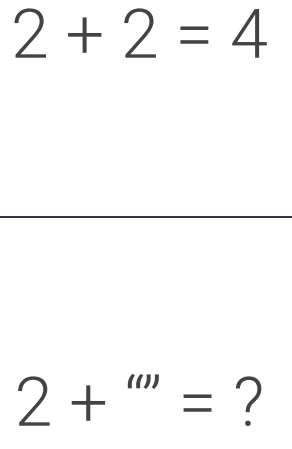

Pero ¿qué pasa si en algún momento nos falta un valor?, entonces ¿qué debería ser el resultado de está operación?
1. El resultado será otro valor faltante es decir algo desconocido.
2. Este otro resultado podría ser un **Warning** de que esto no está funcionando como debería, la operación no está permitida de cierta manera o algo así.
3. Finalmente lo último sería que el software no puede trabajar con esto. Y me daría un error sobre el resultado. 

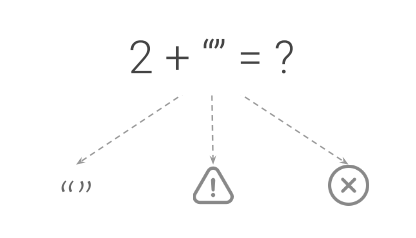

Estas son distintas opciones y todas ellas son validas dependiendo de que el software elija cual regresar. 

Por ejemplo podemos observar 2 códigos: Python y R.

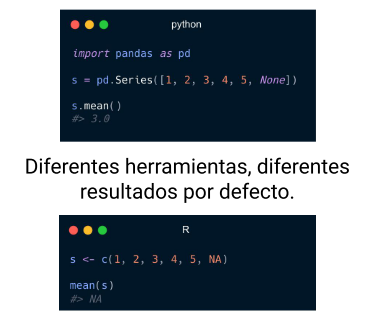

En Python realizamos todo el proceso y vemos que tenemos un valor faltante **None**. Si le aplicamos la **media**, obtenemos como resultado un **3**, con esto podemos deducir que lo está ignorando.

En R realizamos un proceso similar pero el resultado de este será un **valor faltante (NA)**.

Entonces a pesar de que las herramientas están ejecutando la misma función, los resultados son diferentes.

Recordemos que:

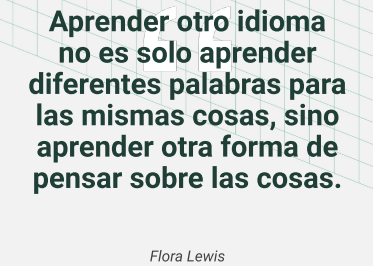

Así podemos hacer una comparación diciendo que cada software es distinto y adentrarnos en el para aprender como tratar los valores faltantes.

## Manejando nuestro Deepnote o Notebook
Descarguemos todos los recursos de la clase y recordemos que los notebooks para que yo los use serán los que empiecen en **live**, y los archivos completos no tienen esta palabra. Así si tenemos algún problema podemos recurrir a ellos para saber como enfrentar el reto o como debería ser el código.

## Configuración de ambiente de trabajo.
Primero creemos un entorno con conda y después ejecutemos el archivo [requirements.txt](requirements.txt) para instalar las dependencias adecuadas.

```sh
#Crear un entorno llamado detección con python 3.9
conda create --name deteccion python=3.9
#Para que sea más rápido lo haré con mamba
mamba create --name deteccion python=3.9
#activar el entorno
conda activate deteccion
#instalar las dependencias desde requirements.txt
mamba install --file requirements.txt
#crear archivo requirements.txt si no lo tengo
mamba env export > requirements.txt
```

### Importando librerías

In [1]:
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

## Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Operar con valores faltantes

In [5]:
#Representación de valores faltantes en Python
print(
    None or True,
    None or False,
    None == None,
    None is None,
    #¿Qué pasa si tengo un faltante y le sumo un valor
)

True False True True


In [7]:
print(
    #¿Qué pasa si tengo un faltante y le sumo un valor
    #None + True
    None + 1
)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

Me arroja un error y dice que no soporta este tipo de operación. ¿Por qué?

In [8]:
print(
    type(None)
)

<class 'NoneType'>


Es un tipo característico y que Python no tiene definido como manejar estos datos. Agregando parámetro a print para separar.

In [9]:
#Representación de valores faltantes en Python
print(
    None or True,
    None or False,
    None == None,
    None is None,
    sep='\n'
)

True
False
True
True


## Numpy

Es una de las formas con las que vamos a trabajar los valores faltantes.     
La forma en la que Numpy los representa es a traves de **np.nan**

In [10]:
print(
    np.nan,
    sep='\n'
)

nan


In [11]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    sep='\n'
)

nan
False
True


Esto es debido a cómo esta funcionando Python y cómo Numpy está manejando estos valores faltantes. Pero si ahora intentamos realizar operaciones con los valores nulos.

In [14]:
print(
    np.nan/2,
    type(np.nan),
    sep='\n'
)

nan
<class 'float'>


Podemos ver que con Numpy si se puede realizar operaciones con valores faltantes.

¿Por qué sucede?     
Sucede porque si nosotros verificamos el tipo de dato que es **nan** , el resultado es que es de la clase **float**. Esto quiere decir que es un número y que puedo realizar operaciones con el a pesar de que me regrese como resultado un **nan**

In [15]:
#¿Cómo pregunto sobre un valor faltante?
print(
    np.isnan(np.nan),
    sep='\n'
)

True


De esta forma nos aseguramos de saber si es un valor faltante.

## Pandas

In [17]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


Aquí podemos ver como esta representando los valores faltantes. ¿Qué esta pasando y por qué Pandas tiene tantas formas de representar los valores faltantes?

Sucede que Pandas está en una constante evolución y hace que se representen como **datos faltantes** y no como **float**.

Tomando en cuenta que Pandas a estos datos
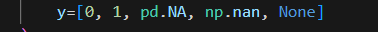     
Los representa como **NaN**, pero veamos que existen otras formas.

### **¿Cómo podemos preguntar en Pandas si un DF tiene valores nulos?**

In [18]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


Entonces podemos  ver que     
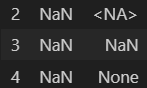     
Son distintas formas de representar a los **NaN** o nulos. Pero otra forma en la que nos lo encontraremos en distintos lugares es como **null**

In [19]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


En realidad `isna()` es un sinónimo de `isnull()`, así que podemos usar el que mejor nos convenga.

En Pandas también podemos aplicarlo a una cierta columna en lugar de todo el Data Frame

In [20]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

Ahora podríamos crear diferentes series de datos con Pandas 

In [21]:
pd.Series([1,np.nan])

0    1.0
1    NaN
dtype: float64

### ¿Qué pasa si usamos formatos de fecha?
Tenemos para este caso el **NaT**, que es una forma de identificar los datos nulos en series de tiempo.

In [22]:
pd.Series([pd.to_datetime('2024-01-01'),np.nan])

0   2024-01-01
1          NaT
dtype: datetime64[ns]

In [23]:
pd.Series([pd.to_datetime('2024-01-01'),np.nan]).isnull()

0    False
1     True
dtype: bool

Pero como vemos si le preguntamos que si es nulo, la respuesta será afirmativa.

In [24]:
pd.Series([-1]).isnull()

0    False
dtype: bool

En algunas ocasiones los valores nulos o faltantes son representados con **-1**, pero si vemos Pandas no lo trata así. ¿Por qué sucede esto? Lo averiguaremos en clases posteriores.

## Extras

[Working with missing values](https://pandas.pydata.org/docs/user_guide/missing_data.html)